In [18]:
import os

import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

In [19]:
dataset = tf.keras.utils.get_file(
      fname="imdb.tar.gz", 
      origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", 
      extract=True)

In [20]:
def load_data(dir):
    pos_df = load_directory_data(os.path.join(dir, "pos"))
    neg_df = load_directory_data(os.path.join(dir, "neg"))
    pos_df["sentiment"] = 1
    neg_df["sentiment"] = 0
    
    return pd.concat([pos_df, neg_df]).sample(frac=1).reset_index(drop=True)

In [21]:
def load_directory_data(dir):
    data = {}
    data["review"] = []
    for file_path in os.listdir(dir):
        with open(os.path.join(dir, file_path), "r") as file:
            data["review"].append(file.read())
            
    return pd.DataFrame.from_dict(data)

In [22]:
train_df = load_data(os.path.join(os.path.dirname(dataset), "aclImdb", "train"))
test_df = load_data(os.path.join(os.path.dirname(dataset), "aclImdb", "test"))

In [23]:
train_df.head()

,review,sentiment
0,I rented this film yesterday mostly due to the...,0
1,A half-hearted attempt to bring Elvis Presley ...,0
2,The pakage implies that Warren Beatty and Gold...,0
3,The film My Name is Modesty is based around an...,0
4,I think Micheal Ironsides acting career must b...,0


In [7]:
reviews = list(train_df['review'])

# EDA

### 데이터 카운트 리스트 생성

In [8]:
# 문자열 문장 리스트를 토크나이즈
tokenized_reviews = [r.split() for r in reviews]

In [9]:
# 토크나이즈 된 리스트에 대한 각 길이를 저장
review_len_by_token = [len(t) for t in tokenized_reviews]

In [10]:
# 토크나이즈 된 것을 붙여서 음절의 길이를 저장
review_len_by_eumjeol = [len(s.replace(' ', '')) for s in reviews]

Text(0, 0.5, 'Number of Reviews')

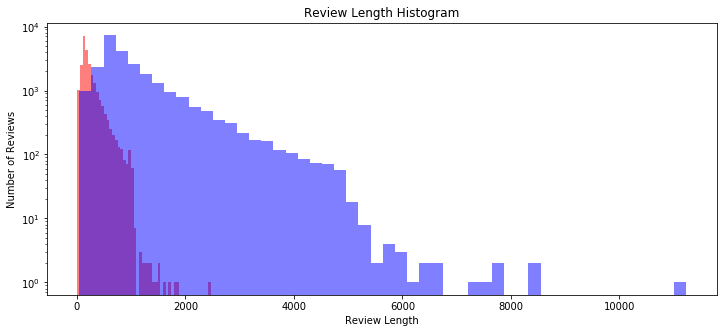

In [24]:
import matplotlib.pyplot as plt

# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(review_len_by_token, bins=50, alpha=0.5, color= 'r', label='word')
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Review Length Histogram')
# 그래프 x 축 라벨
plt.xlabel('Review Length')
# 그래프 y 축 라벨
plt.ylabel('Number of Reviews')

In [12]:
import numpy as np

print('문장 최대길이: {}'.format(np.max(review_len_by_token)))
print('문장 최소길이: {}'.format(np.min(review_len_by_token)))
print('문장 평균길이: {:.2f}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(review_len_by_token)))
print('문장 중간길이: {}'.format(np.median(review_len_by_token)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 길이: {}'.format(np.percentile(review_len_by_token, 25)))
print('제 3 사분위 길이: {}'.format(np.percentile(review_len_by_token, 75)))

문장 최대길이: 2470
문장 최소길이: 10
문장 평균길이: 233.79
문장 길이 표준편차: 173.73
문장 중간길이: 174.0
제 1 사분위 길이: 127.0
제 3 사분위 길이: 284.0


{'whiskers': [<matplotlib.lines.Line2D at 0xb56716e48>,
 'caps': [<matplotlib.lines.Line2D at 0xb5675f518>,
 'boxes': [<matplotlib.lines.Line2D at 0xb56716cf8>],
 'medians': [<matplotlib.lines.Line2D at 0xb5675fba8>],
 'fliers': [<matplotlib.lines.Line2D at 0xb56767240>],
 'means': [<matplotlib.lines.Line2D at 0xb5675fef0>]}

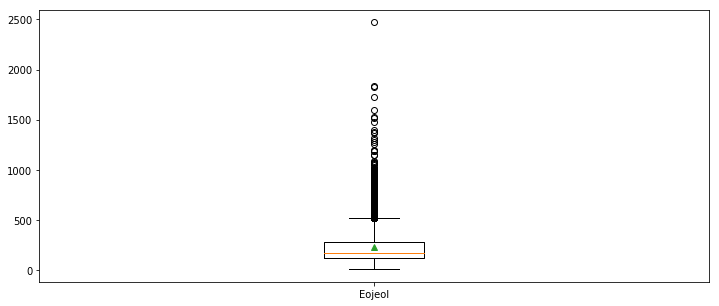

In [13]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([review_len_by_token],
             labels=['Eojeol'],
             showmeans=True)

{'whiskers': [<matplotlib.lines.Line2D at 0xb568dfef0>,
 'caps': [<matplotlib.lines.Line2D at 0xb568e75c0>,
 'boxes': [<matplotlib.lines.Line2D at 0xb568dfda0>],
 'medians': [<matplotlib.lines.Line2D at 0xb568e7c50>],
 'fliers': [<matplotlib.lines.Line2D at 0xb568f22e8>],
 'means': [<matplotlib.lines.Line2D at 0xb568e7f98>]}

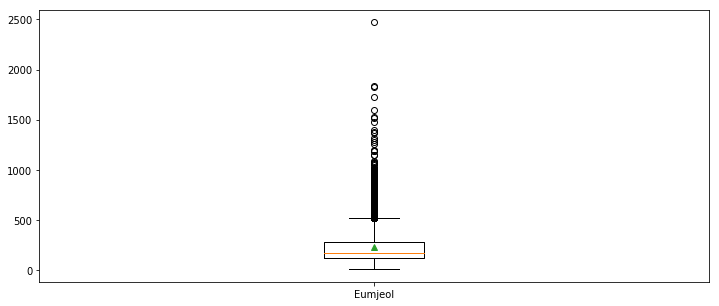

In [14]:
plt.figure(figsize=(12, 5))
plt.boxplot([review_len_by_token],
             labels=['Eumjeol'], 
             showmeans=True)

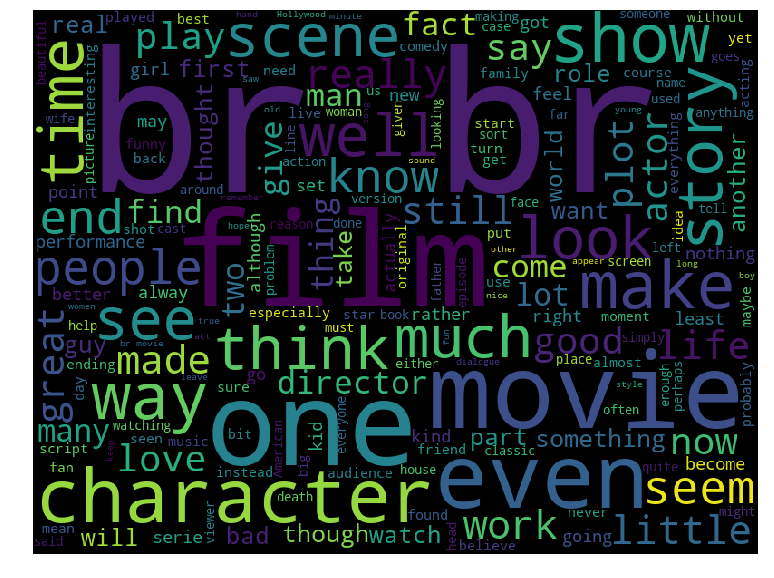

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', width = 800, height = 600).generate(' '.join(train_df['review']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

NameError: name 'trainDf' is not defined

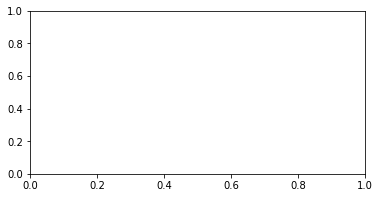

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = train_df['sentiment'].value_counts()
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_df['sentiment'])